In [11]:
from mylib import read_stats, twokr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# **.spawner.tl = exponential(${6, 14}min)
# **.spawner.to = exponential(${6, 14}min)
# **.spawner.tp = exponential(${50, 5000}min)
# **.spawner.tn = exponential(30min)
TL = [6, 14]
TO = [6, 14]
TP = [60, 6000]
tn = 30
REP = range(10)


BASE_DIR = "../simulations/results/"

stats = read_stats(BASE_DIR + "Twokr-{},{},{}-#{}.sca.csv", TL, TO, TP, REP)
stats.keys()

dict_keys(['landQueueLen', 'landQueueTime', 'numParked', 'toffQueueLen', 'toffQueueTime'])

In [6]:
import itertools as it
factors = ["tl", "to", "tp"]
m = {0:-1,1:1}
measurements = {
	tuple(m[I.index(i)] for I,i in zip([TL, TO, TP], par)) : 
	[stats["numParked"][(*par, rep)].timeavg for rep in REP] for par in it.product(TL, TO, TP)
	}
twokr(factors, measurements)

{'tl': 4.3493704738643444e-10,
 'to': 3.1673206893382894e-10,
 'tp': 0.9997403982759473,
 'tl & to': 3.5611625991868287e-11,
 'tl & tp': 5.159892236347244e-10,
 'to & tp': 3.4690468608242e-10,
 'tl & to & tp': 2.784283266652402e-11,
 'SSE/SST': 0.0002596000460350716}

In [7]:
factors = ["tl", "to", "tp"]
for name in ["landQueueTime", "toffQueueTime"]:
	measurements = {
		tuple(m[I.index(i)] for I,i in zip([TL, TO, TP], par)) : 
		[stats[name][(*par, rep)].mean for rep in REP] for par in it.product(TL, TO, TP)
		}
	print(name)
	print(twokr(factors, measurements))
	print()

landQueueTime
{'tl': 0.7003844329062997, 'to': 0.2742833796164042, 'tp': 1.5489257132933666e-06, 'tl & to': 0.010283409872065273, 'tl & tp': 8.758544995084303e-06, 'to & tp': 1.822700552537853e-08, 'tl & to & tp': 6.498002154468749e-07, 'SSE/SST': 0.015037802107301709}

toffQueueTime
{'tl': 0.32177684515006366, 'to': 0.2802327823299393, 'tp': 0.006156202170569941, 'tl & to': 0.2318625348992362, 'tl & tp': 0.005326478140621291, 'to & tp': 0.004566267291319279, 'tl & to & tp': 0.003933080207194448, 'SSE/SST': 0.14614580981105588}



In [8]:

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    return mean, confidence_interval

import scipy.stats as sp_st
import matplotlib.pyplot as plt
nth_quantile = {
	"norm" : sp_st.norm.ppf
}

def qqplot(data, dist="norm"):
	n = len(data)
	plt.plot([nth_quantile[dist]((j+0.5)/n) for j in range(n)], sorted(data), 'o')
	plt.plot(plt.xlim(), plt.ylim(), "--", color="lightgrey")

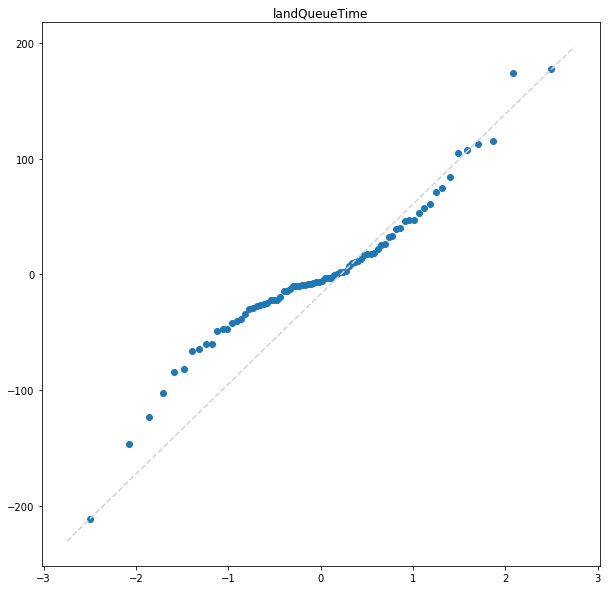

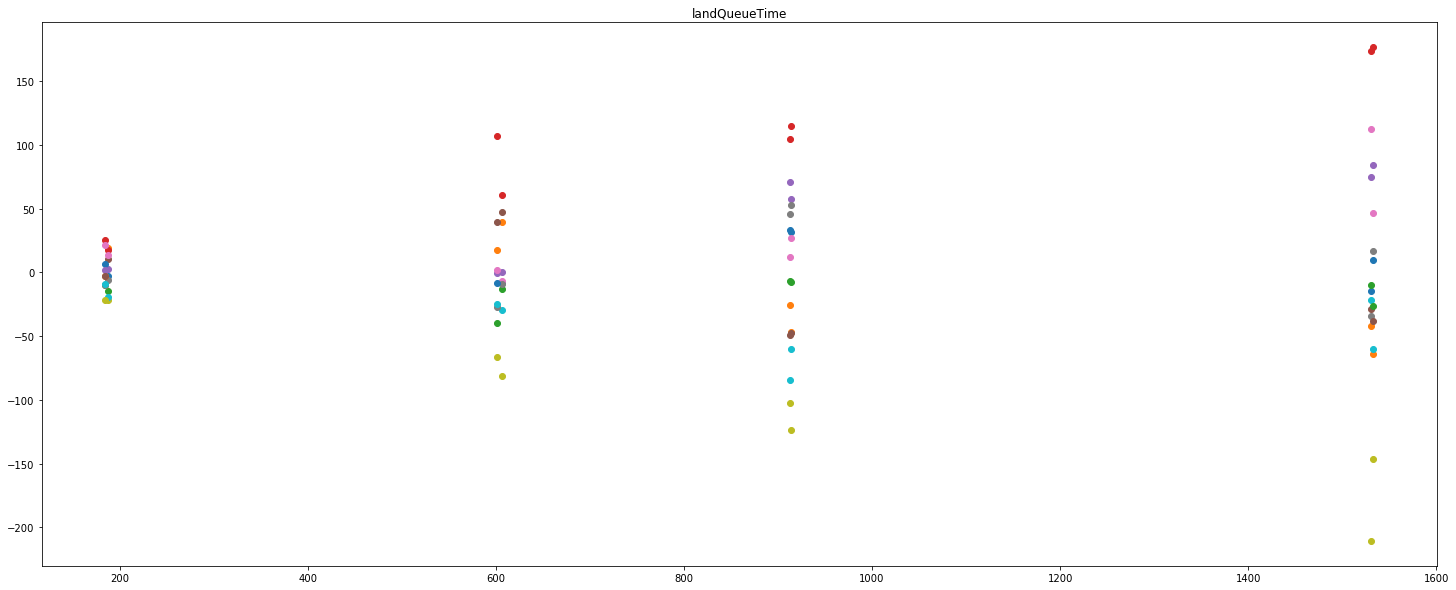

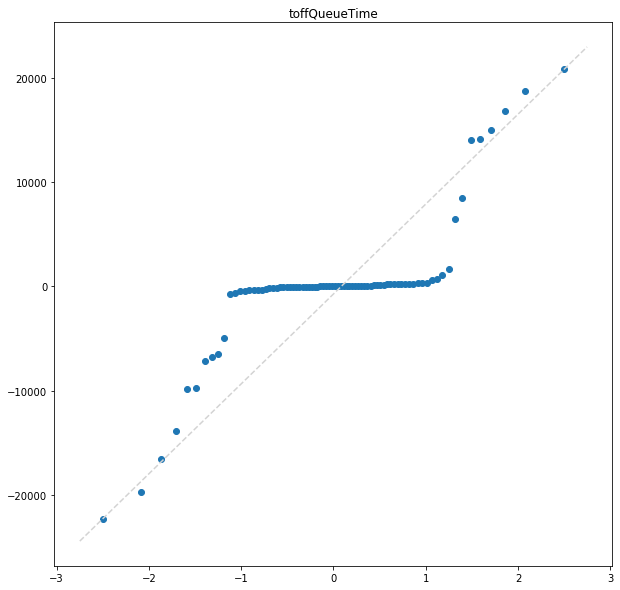

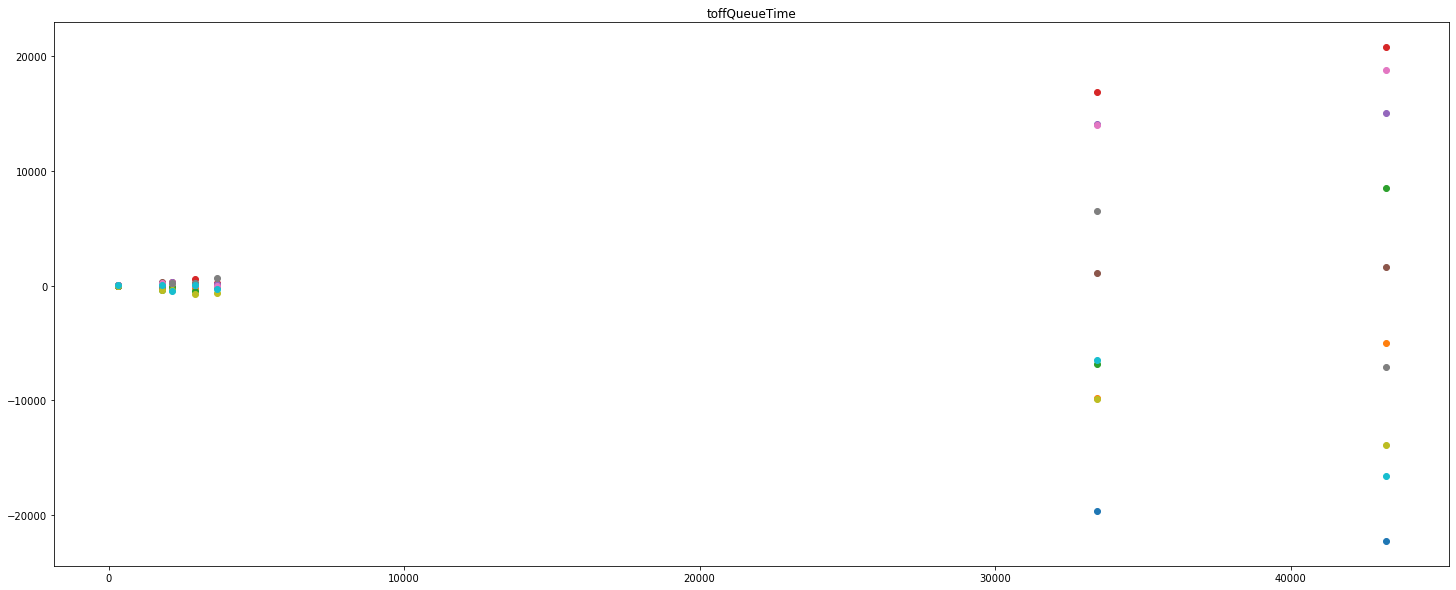

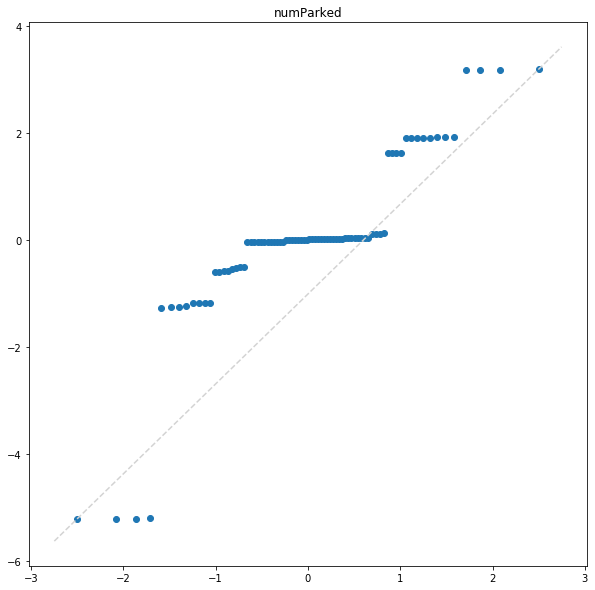

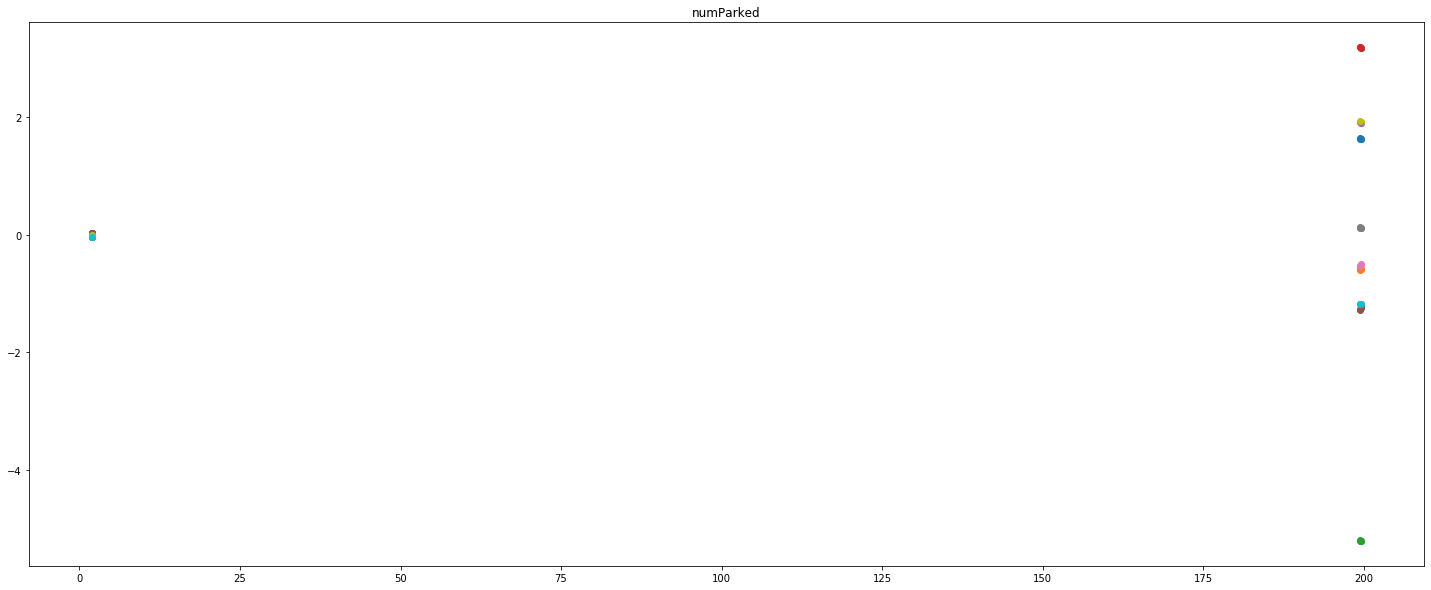

In [16]:
# measurements = {(-1,-1):[15, 18, 12], (1, -1):[45, 48, 51], (-1, 1):[25, 28, 19], (1, 1):[75, 75, 81]}
# d = list(map(np.asarray,measurements.values()))
# d = list(it.chain.from_iterable(v - np.mean(v) for v in d))
# qqplot(d)

for name in ["landQueueTime", "toffQueueTime"]:
	plt.rcParams["figure.figsize"] = (10, 10)
	d = [[stats[name][tl,to,tp,rep].mean for rep in REP] for tl,to,tp in it.product(TL, TO, TP)]
	dd = list(it.chain(*[np.mean(v) - v for v in d]))
	qqplot(dd)
	plt.title(name)
	plt.show()

	plt.rcParams["figure.figsize"] = (25, 10)
	for res in d:
		for p in res:
			plt.plot(np.mean(res), np.mean(res)- p, "o")
	plt.title(name)
	plt.show()


for name in ["numParked"]:
	plt.rcParams["figure.figsize"] = (10, 10)
	d = [[stats[name][tl,to,tp,rep].timeavg for rep in REP] for tl,to,tp in it.product(TL, TO, TP)]
	dd = list(it.chain(*[np.mean(v) - v for v in d]))
	qqplot(dd)
	plt.title(name)
	plt.show()

	plt.rcParams["figure.figsize"] = (25, 10)
	for res in d:
		for p in res:
			plt.plot(np.mean(res), np.mean(res)- p, "o")
	plt.title(name)
	plt.show()